# 聚类

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
raw_data = np.loadtxt('./datacode_for_book/chapter4/cluster.txt')
x = raw_data[:,:-1]
y_true = raw_data[:,-1]
x[:5]
y_true[:5]

array([[ 0.58057881,  0.43199283],
       [ 1.70562094,  1.16006288],
       [ 0.8016818 , -0.51336891],
       [-0.15328359, -1.64435136],
       [ 0.70765057, -1.65668129]])

array([0., 0., 2., 1., 2.])

In [5]:
n_clusters = 3
model_kmeans = KMeans(n_clusters=n_clusters,random_state=0)
model_kmeans.fit(x)
y_predict = model_kmeans.predict(x)
y_predict[:5]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

array([1, 1, 2, 0, 2])

In [16]:
#模型效果评估
n_samples,n_features = x.shape
inertias = model_kmeans.inertia_  # 样本距离最近的聚类中心的总和
inertias
adjusted_rand_s = metrics.adjusted_rand_score(y_true, y_predict)  # 调整后的兰德指数
adjusted_rand_s
mutual_info_s = metrics.mutual_info_score(y_true, y_predict)  # 互信息
mutual_info_s
adjusted_mutual_info_s = metrics.adjusted_mutual_info_score(y_true, y_predict)  # 调整后的互信息
adjusted_mutual_info_s
homogeneity_s = metrics.homogeneity_score(y_true, y_predict)  # 同质化得分
homogeneity_s
completeness_s = metrics.completeness_score(y_true, y_predict)  # 完整性得分
completeness_s
v_measure_s = metrics.v_measure_score(y_true, y_predict)  # V-measure得分
v_measure_s
silhouette_s = metrics.silhouette_score(x, y_predict, metric='euclidean')  # 平均轮廓系数
silhouette_s
calinski_harabaz_s = metrics.calinski_harabaz_score(x, y_predict)  # Calinski和Harabaz得分
calinski_harabaz_s

300.1262936093466

0.9642890803276076

1.0310595406681184

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.938399249349474

0.9385116928897981

0.9385372785555511

0.938524485548298

0.6342086134083013

2860.8215946947635

In [17]:
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('ine\tARI\tMI\tAMI\thomo\tcomp\tv_m\tsilh\tc&h')  # 打印输出指标标题
print ('%d\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%d' % (
inertias, adjusted_rand_s, mutual_info_s, adjusted_mutual_info_s, homogeneity_s, completeness_s, v_measure_s,
silhouette_s, calinski_harabaz_s))  # 打印输出指标值
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ine \t inertias')
print ('ARI \t adjusted_rand_s')
print ('MI \t mutual_info_s')
print ('AMI \t adjusted_mutual_info_s')
print ('homo \t homogeneity_s')
print ('comp \t completeness_s')
print ('v_m \t v_measure_s')
print ('silh \t silhouette_s')
print ('c&h \t calinski_harabaz_s')

samples: 1000 	 features: 2
----------------------------------------------------------------------
ine	ARI	MI	AMI	homo	comp	v_m	silh	c&h
300	0.96	1.03	0.94	0.94	0.94	0.94	0.63	2860
----------------------------------------------------------------------
short name 	 full name
ine 	 inertias
ARI 	 adjusted_rand_s
MI 	 mutual_info_s
AMI 	 adjusted_mutual_info_s
homo 	 homogeneity_s
comp 	 completeness_s
v_m 	 v_measure_s
silh 	 silhouette_s
c&h 	 calinski_harabaz_s


<Figure size 1152x576 with 0 Axes>

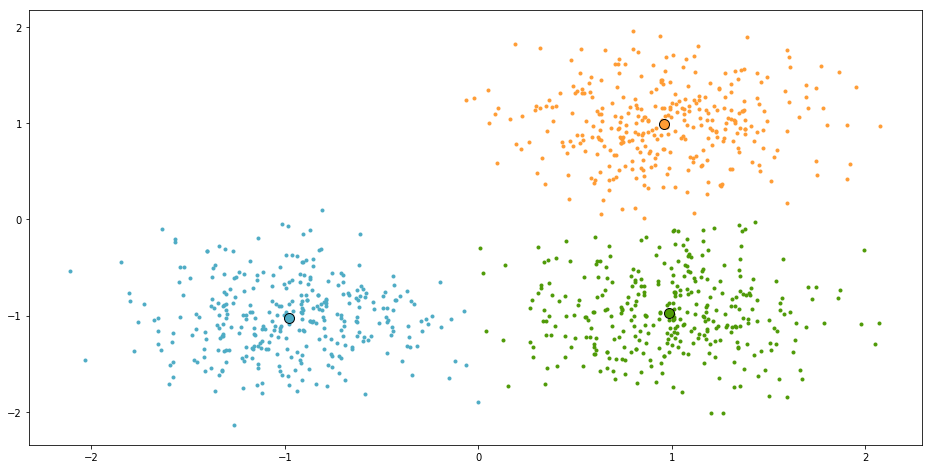

In [21]:
# 模型效果可视化
centers = model_kmeans.cluster_centers_  # 各类别中心
colors = ['#4EACC5', '#FF9C34', '#4E9A06']  # 设置不同类别的颜色
plt.figure(figsize=(16,8))  # 建立画布
for i in range(n_clusters):  # 循环读类别
    index_sets = np.where(y_predict == i)  # 找到相同类的索引集合
    cluster = x[index_sets]  # 将相同类的数据划分为一个聚类子集
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], marker='.')  # 展示聚类子集内的样本点
    plt.plot(centers[i][0], centers[i][1], 'o', markerfacecolor=colors[i], markeredgecolor='k',
             markersize=10)  # 展示各聚类子集的中心
plt.show()  # 展示图像

In [22]:
# 模型应用
new_X = [1, 3.6]
cluster_label = model_kmeans.predict(np.array(new_X).reshape(1,-1))
print ('cluster of new data point is: %d' % cluster_label)

cluster of new data point is: 1


In [25]:
#保存模型
import pickle
pickle.dump(model_kmeans,open('./kmeans_model.model','wb'))
pickle.load(open('./kmeans_model.model','rb'))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

# 线性回归

In [2]:
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
# from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法

![回归指标](https://github.com/longfengpili/Data-Analysis-and-Data-Operation-with-python/blob/master/%E5%9B%9E%E5%BD%92%E8%AF%84%E4%BB%B7%E6%8C%87%E6%A0%87.png?raw=true)

In [3]:
# 数据准备
raw_data = np.loadtxt('./datacode_for_book/chapter4/regression.txt')  # 读取数据文件
X = raw_data[:, :-1]  # 分割自变量
y = raw_data[:, -1]  # 分割因变量
X[:3]
y[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

array([24. , 21.6, 34.7])

<Figure size 1152x360 with 0 Axes>

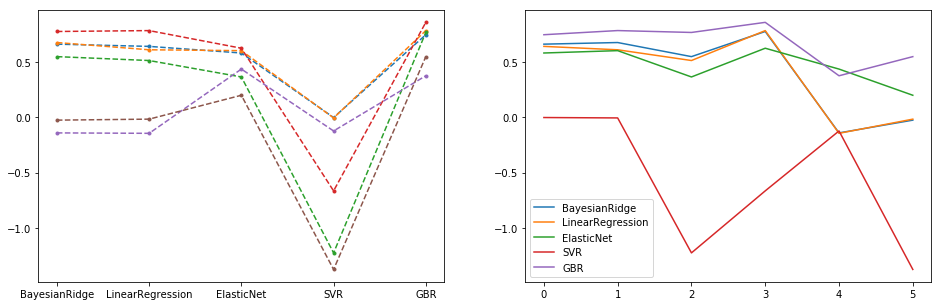

In [4]:
# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  # 建立普通线性回归模型对象
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_svr = SVR(gamma='auto')  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']  # 不同模型的名称列表
model_dic = [model_br, model_lr, model_etc, model_svr, model_gbr]  # 不同回归模型对象的集合
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, X, y, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(X, y).predict(X))  # 将回归训练中得到的预测y存入列表
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(model_names,cv_score_list,'.--')
plt.subplot(1,2,2)
for index,name in enumerate(model_names):
    plt.plot(list(range(n_folds)),cv_score_list[index],label=name)
plt.legend()

In [6]:
# 模型效果指标评估
n_samples, n_features = X.shape  # 总样本量,总特征数
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(5):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
df1
df2

,0,1,2,3,4,5
BayesianRidge,0.662422,0.677079,0.549702,0.776896,-0.139738,-0.024448
LinearRegression,0.642240,0.611521,0.514471,0.785033,-0.143673,-0.015390
ElasticNet,0.582476,0.603773,0.365912,0.625645,0.437122,0.200454
SVR,-0.000799,-0.004447,-1.224386,-0.663773,-0.122252,-1.374062
GBR,0.747724,0.785265,0.768194,0.859493,0.376628,0.549563


,ev,mae,mse,r2
BayesianRidge,0.731143,3.319204,22.696772,0.731143
LinearRegression,0.740608,3.272945,21.897779,0.740608
ElasticNet,0.686094,3.592915,26.499828,0.686094
SVR,0.173548,5.447960,71.637552,0.151410
GBR,0.975126,1.151773,2.099835,0.975126


<Figure size 1152x576 with 0 Axes>

Text(0.5,1,'regression result comparison')

Text(0,0.5,'real and predicted value')

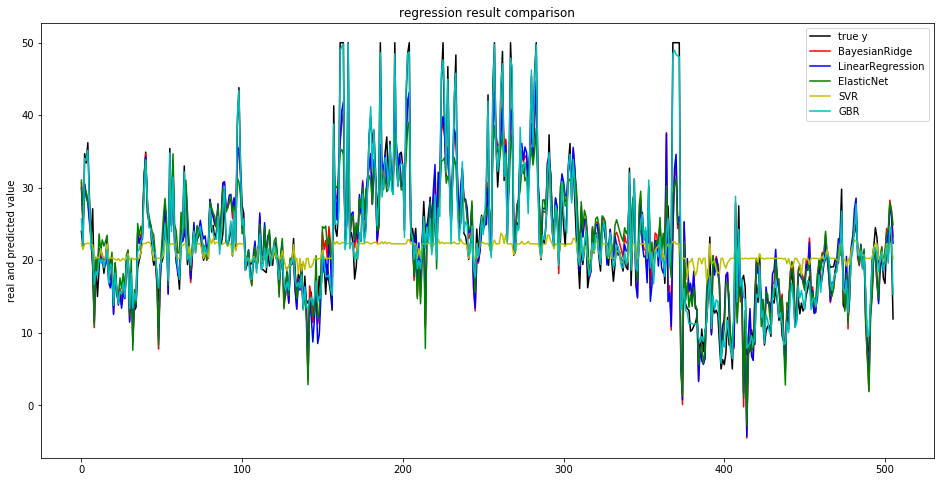

In [8]:
# 模型效果可视化
plt.figure(figsize=(16,8))  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(X.shape[0]), pre_y_list[i], color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题

In [9]:
# 模型应用
print ('regression prediction')
new_point_set = [[1.05393, 0., 8.14, 0., 0.538, 5.935, 29.3, 4.4986, 4., 307., 21., 386.85, 6.58],
                 [0.7842, 0., 8.14, 0., 0.538, 5.99, 81.7, 4.2579, 4., 307., 21., 386.75, 14.67],
                 [0.80271, 0., 8.14, 0., 0.538, 5.456, 36.6, 3.7965, 4., 307., 21., 288.99, 11.69],
                 [0.7258, 0., 8.14, 0., 0.538, 5.727, 69.5, 3.7965, 4., 307., 21., 390.95, 11.28]]  # 要预测的新数据集
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    new_pre_y = model_gbr.predict(np.array(new_point).reshape(1,-1))  # 使用GBR进行预测
    print ('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息

regression prediction
predict for new point 1 is:  21.49
predict for new point 2 is:  16.84
predict for new point 3 is:  19.50
predict for new point 4 is:  19.16


# 分类分析

In [1]:
# 导入库
import numpy as np  # 导入numpy库
from sklearn.model_selection import train_test_split  # 数据分区库
from sklearn import tree  # 导入决策树库
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, \
    roc_curve  # 导入指标库
import prettytable  # 导入表格库
import pydotplus  # 导入dot插件库
import matplotlib.pyplot as plt  # 导入图形展示库
import graphviz

+ 【accuracy_score】A = (TP + TN)/(P+N) = (TP + TN)/(TP + FN + FP + TN); 反映了分类器统对整个样本的判定能力——能将正的判定为正，负的判定为负 
+ 【auc】计算AUC值，其中x,y分别为数组形式，根据(xi,yi)在坐标上的点，生成的曲线，然后计算AUC值；
+ 【confusion_matrix】
+ 【f1_score】F = 2 * 召回率 * 准确率/ (召回率+准确率)；这就是传统上通常说的F1 measure。
+ 【precision_score】P = TP/(TP+FP) ; 反映了被分类器判定的正例中真正的正例样本的比重。
+ 【recall_score】R = TP/(TP+FN) = 1 - FN/T; 反映了被正确判定的正例占总的正例的比重 。
+ 【roc_curve】ROC曲线指受试者工作特征曲线/接收器操作特性(receiver operating characteristic，ROC)曲线,是反映灵敏性和特效性连续变量的综合指标,是用构图法揭示敏感性和特异性的相互关系，它通过将连续变量设定出多个不同的临界值，从而计算出一系列敏感性和特异性。ROC曲线是根据一系列不同的二分类方式（分界值或决定阈），以真正例率（也就是灵敏度）（True Positive Rate,TPR）为纵坐标，假正例率（1-特效性）（False Positive Rate,FPR）为横坐标绘制的曲线。
    + 纵坐标：真正率（True Positive Rate , TPR）或灵敏度（sensitivity）TPR = TP /（TP + FN）  （正样本预测结果数 / 正样本实际数）
    + 横坐标：假正率（False Positive Rate , FPR）FPR = FP /（FP + TN） （被预测为正的负样本结果数 /负样本实际数）

In [2]:
# 数据准备
raw_data = np.loadtxt('./datacode_for_book/chapter4/classification.csv', delimiter=',', skiprows=1, )  # 读取数据文件
X = raw_data[:, :-1]  # 分割X
y = raw_data[:, -1]  # 分割y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)  # 将数据分为训练集和测试集

In [3]:
# 训练分类模型
model_tree = tree.DecisionTreeClassifier(random_state=0)  # 建立决策树模型对象
model_tree.fit(X_train, y_train)  # 训练决策树模型
pre_y = model_tree.predict(X_test)  # 使用测试集做模型效果检验

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [4]:
# 输出模型概况
n_samples, n_features = X.shape  # 总样本量,总特征数
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线

samples: 21927 	 features: 4
----------------------------------------------------------------------


In [5]:
# 混淆矩阵
confusion_m = confusion_matrix(y_test, pre_y)  # 获得混淆矩阵
confusion_m
confusion_matrix_table = prettytable.PrettyTable()  # 创建表格实例
confusion_matrix_table.add_row(confusion_m[0, :])  # 增加第一行数据
confusion_matrix_table.add_row(confusion_m[1, :])  # 增加第二行数据
print ('confusion matrix')
print (confusion_matrix_table)  # 打印输出混淆矩阵

array([[5615,  284],
       [ 321,  359]], dtype=int64)

confusion matrix
+---------+---------+
| Field 1 | Field 2 |
+---------+---------+
|   5615  |   284   |
|   321   |   359   |
+---------+---------+


In [6]:
# 核心评估指标
y_score = model_tree.predict_proba(X_test)  # 获得决策树的预测概率
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])  # ROC
auc_s = auc(fpr, tpr)  # AUC
accuracy_s = accuracy_score(y_test, pre_y)  # 准确率
precision_s = precision_score(y_test, pre_y)  # 精确度
recall_s = recall_score(y_test, pre_y)  # 召回率
f1_s = f1_score(y_test, pre_y)  # F1得分
core_metrics = prettytable.PrettyTable()  # 创建表格实例
core_metrics.field_names = ['auc', 'accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
core_metrics.add_row([auc_s, accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
print ('core metrics')
print (core_metrics)  # 打印输出核心评估指标

core metrics
+--------------------+--------------------+--------------------+--------------------+-----------------+
|        auc         |      accuracy      |     precision      |       recall       |        f1       |
+--------------------+--------------------+--------------------+--------------------+-----------------+
| 0.7498701175672846 | 0.9080407356741146 | 0.5583203732503889 | 0.5279411764705882 | 0.5427059712774 |
+--------------------+--------------------+--------------------+--------------------+-----------------+


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'ROC')

Text(0.5, 0, 'false positive rate')

Text(0, 0.5, 'true positive rate')

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'feature importance')

Text(0.5, 0, 'features')

Text(0, 0.5, 'importance')

Text(0.5, 0.98, 'classification result')

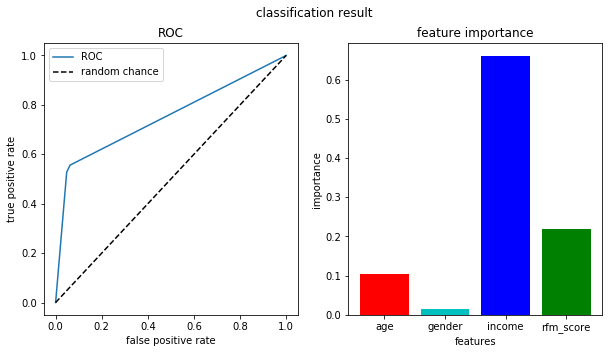

In [7]:
# 模型效果可视化
names_list = ['age', 'gender', 'income', 'rfm_score']  # 分类模型维度列表
color_list = ['r', 'c', 'b', 'g']  # 颜色列表
plt.figure(figsize=(10,5))  # 创建画布
# 子网格1：ROC曲线
plt.subplot(1, 2, 1)  # 第一个子网格
plt.plot(fpr, tpr, label='ROC')  # 画出ROC曲线
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')  # 画出随机状态下的准确率线
plt.title('ROC')  # 子网格标题
plt.xlabel('false positive rate')  # X轴标题
plt.ylabel('true positive rate')  # y轴标题
plt.legend(loc=0)
# 子网格2：指标重要性
feature_importance = model_tree.feature_importances_  # 获得指标重要性
plt.subplot(1, 2, 2)  # 第二个子网格
plt.bar(np.arange(feature_importance.shape[0]), feature_importance, tick_label=names_list, color=color_list)  # 画出条形图
plt.title('feature importance')  # 子网格标题
plt.xlabel('features')  # x轴标题
plt.ylabel('importance')  # y轴标题
plt.suptitle('classification result')  # 图形总标题

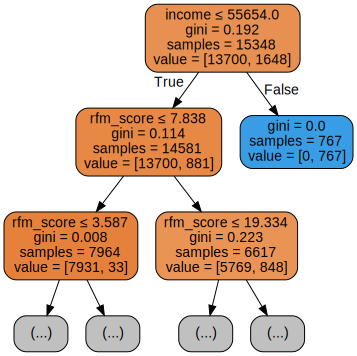

In [8]:
# 保存决策树规则图为PDF文件
dot_tree = tree.export_graphviz(model_tree,out_file=None,feature_names=names_list,max_depth=2,
                                filled=True, rounded=True,special_characters=True)# 将决策树规则生成dot对象
graph = graphviz.Source(dot_tree)
graph

In [9]:
# 模型应用
X_new = [[40, 0, 55616, 0], [17, 0, 55568, 0], [55, 1, 55932, 1]]
print ('classification prediction')
for i, data in enumerate(X_new):
    y_pre_new = model_tree.predict(np.array(data).reshape(1,-1))
    print ('classification for %d record is: %d' % (i + 1, y_pre_new))

classification prediction
classification for 1 record is: 0
classification for 2 record is: 0
classification for 3 record is: 1


# 关联分析

In [1]:
# 导入库
import sys

sys.path.append('./datacode_for_book/chapter4/')
import pandas as pd
from graphviz import Digraph
import graphviz
import apriori,apriori_original

In [2]:
# 定义数据文件
fileName = './datacode_for_book/chapter4/association.txt'

In [3]:
# 定义数据文件
fileName = './datacode_for_book/chapter4/association.txt'
import re
from numpy import *

# 数据集读取分割创建合并订单的事务型数据
def createData(fileName):
    mat = []
    req = re.compile(r',')
    fr = open(fileName)
    content = fr.readlines()
    for line in content:
        tem = line.replace('\n','').split(',')
        mat.append(tem)
    return mat

# 创建一个包含所有项的不变集合
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    return map(frozenset,C1)  # 使用frozenset格式，作为字段的key

# 计算所有项集的支持度
def scanD(D, Ck, minSupport):
    ssCnt = {}
    D = list(D)
    Ck = list(Ck)
#     print(len(D))
#     print(len(Ck))
    for tid in D:
        for can in Ck:
            if set(can).issubset(tid):
                ssCnt[can] = ssCnt.get(can,0) + 1
    numItems = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key] / numItems
        if support >= minSupport:
#             print(key,ssCnt[key],numItems,support)
            retList.insert(0, key)
#             print(key)
            supportData[key] = support
    return retList, supportData

# 创建候选项集CK
def aprioriGen(Lk, k):
    retList = []  # 创建空列表
    lenLk = len(Lk)  # 计算LK中像素的个数
    import itertools
    for l1,l2 in itertools.combinations(Lk,2):
        L = l1 | l2
        if len(L) == k and L not in retList:
            retList.append(L)
    return retList

# 关联主调用程序
def apriori(dataSet, minSupport=0.5):
    L = []
    supportData = {}
    
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))
    Lk, supK = scanD(D, C1, minSupport)
    supportData.update(supK)
    L.extend(Lk)
    
    k = 2
    while Lk:
#         print(supK)
        Ck = aprioriGen(L, k)
        Lk, supK = scanD(D, Ck, minSupport)
        supportData.update(supK)
        L.extend(Lk)
        k += 1
    return L, supportData

# 实例数、支持度、置信度和提升度评估
def calcConf(fileName, L, supportData, brl, minConf=0.7):
    prunedH = []
    D = createData(fileName)
    numItems = float(len(D))
    for conseq in L:
#         print(conseq,L)
#         print(frozenset(L) - frozenset({conseq}))
        conf = supportData[frozenset(L)] / supportData[frozenset(L) - frozenset({conseq})]  # 计算置信度
#         print(conf)
        if conf >= minConf:
            instances = numItems * supportData[frozenset(L)]  # 计算实例数
            liftvalue = conf / supportData[frozenset({conseq})]  # 计算提升度
            
            brl.append((frozenset(L) - frozenset({conseq}), conseq, int(instances), round(supportData[frozenset(L)] , 4), round(conf, 4),
                        round(liftvalue, 4)))  # 支持度已经在SCAND中计算得出
            prunedH.append(conseq)
    return prunedH

# 创建关联规则
def generateRules(fileName, L, supportData, minConf=0.7):  # supportData是从scanD获得的字段
    bigRuleList = []
    for i in range(1, len(L)):  # 只获得又有2个或以上的项目的集合
        if (len(L[i]) > 1):
            prunedH = calcConf(fileName, L[i], suppData, bigRuleList, minConf=minC)
        else:
            pass
    return bigRuleList

In [4]:
# 通过调用自定义的apriori做关联分析
minS = 0.1  # 定义最小支持度阀值
minC = 0.38  # 定义最小置信度阀值
dataSet = createData(fileName)  # 获取格式化的数据集
dataSet[:3]
L, suppData = apriori(dataSet, minSupport=minS)  # 计算得到满足最小支持度的规则
# L[20:23]
print(len(L))
print('-'*70)
rules = generateRules(fileName, L, suppData, minConf=minC)  # 计算满足最小置信度的规则


rules

[['17092020299', '38660935334', '10939241167', '19957944783', '4002591'],
 ['38728350298', '17288980167', '14375520337', '4002591', '19957944783'],
 ['17092020299', '38660935334', '9212465263', '36989298167', '36989298167']]

41
----------------------------------------------------------------------


[(frozenset({'38657641492'}), '38722052311', 13, 0.13, 0.3824, 1.0621),
 (frozenset({'38657641492'}), '38660935334', 13, 0.13, 0.3824, 1.0062),
 (frozenset({'17092020299'}), '38657641492', 14, 0.14, 0.3889, 1.1438),
 (frozenset({'38657641492'}), '17092020299', 14, 0.14, 0.4118, 1.1438),
 (frozenset({'13943415375'}), '17092020299', 13, 0.13, 0.4194, 1.1649),
 (frozenset({'38728350298'}), '38660935334', 14, 0.14, 0.5, 1.3158),
 (frozenset({'13943415375'}), '38660935334', 14, 0.14, 0.4516, 1.1885),
 (frozenset({'17092020299'}), '17288980167', 14, 0.14, 0.3889, 1.341),
 (frozenset({'17288980167'}), '17092020299', 14, 0.14, 0.4828, 1.341),
 (frozenset({'38722052311'}), '38660935334', 14, 0.14, 0.3889, 1.0234),
 (frozenset({'36989298167'}), '38660935334', 13, 0.13, 0.4483, 1.1797),
 (frozenset({'4002591'}), '38728350298', 11, 0.11, 0.4231, 1.511),
 (frozenset({'38728350298'}), '4002591', 11, 0.11, 0.3929, 1.511)]

In [5]:
# 关联结果报表评估
model_summary = 'data record: {1} \nassociation rules count: {0}'  # 展示数据集记录数和满足阀值定义的规则数量
print (model_summary.format(len(rules), len(dataSet)))  # 使用str.format做格式化输出
df = pd.DataFrame(rules, columns=['item1', 'itme2', 'instance', 'support', 'confidence', 'lift'])  # 创建频繁规则数据框
df_lift = df[df['lift'] > 1.0]  # 只选择提升度>1的规则

df_lift['item1'] = df_lift['item1'].apply(lambda x:list(x)[0])
df_lift.sort_values(by='instance', ascending=False)  # 打印排序后的数据框

data record: 100 
association rules count: 13


,item1,itme2,instance,support,confidence,lift
2,17092020299,38657641492,14,0.14,0.3889,1.1438
3,38657641492,17092020299,14,0.14,0.4118,1.1438
5,38728350298,38660935334,14,0.14,0.5000,1.3158
6,13943415375,38660935334,14,0.14,0.4516,1.1885
7,17092020299,17288980167,14,0.14,0.3889,1.3410
8,17288980167,17092020299,14,0.14,0.4828,1.3410
9,38722052311,38660935334,14,0.14,0.3889,1.0234
0,38657641492,38722052311,13,0.13,0.3824,1.0621
1,38657641492,38660935334,13,0.13,0.3824,1.0062
4,13943415375,17092020299,13,0.13,0.4194,1.1649


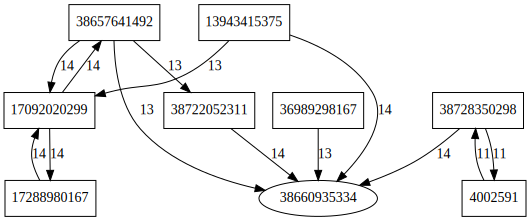

In [6]:
# 关联结果图形展示
dot = Digraph()  # 创建有向图
graph_data = df_lift[['item1', 'itme2', 'instance']]  # 切分画图用的前项、后项和实例数数据
for each_data in graph_data.values:  # 循环读出每条规则
    node1, node2, weight = each_data  # 分割每条数据画图用的前项、后项和实例数
    node1 = str(node1)  # 转化为字符串
    node2 = str(node2)  # 转化为字符串
    label = '%s' % weight  # 创建一个标签用于展示实例数
    dot.node(node1, node1, shape='record')  # 增加节点（规则中的前项）
    dot.edge(node1, node2, label=label, constraint='true')  # 增加有向边
# dot.render('apriori', view=True)  # 保存规则为pdf文件
dot

# 异常检测

In [7]:
# 导入库
from sklearn.svm import OneClassSVM  # 导入OneClassSVM
import numpy as np  # 导入numpy库
import matplotlib.pyplot as plt  # 导入Matplotlib
from mpl_toolkits.mplot3d import Axes3D  # 导入3D样式库

In [9]:
# 数据准备
raw_data = np.loadtxt('./datacode_for_book/chapter4/outlier.txt', delimiter=' ')  # 读取数据
train_set = raw_data[:900, :]  # 训练集
test_set = raw_data[900:, :]  # 测试集
train_set[:5]
test_set[:5]

array([[ 0.03685295,  0.0343899 ,  0.09197858, -0.01026255, -0.00814121],
       [-0.0011522 ,  0.02174971, -0.02040125,  0.00986554, -0.03447136],
       [-0.01258645,  0.04736393,  0.01110832, -0.01156876, -0.02334062],
       [-0.02837847,  0.04398011,  0.00126378,  0.02313849,  0.00542565],
       [ 0.02222529,  0.00715191, -0.03713534, -0.02938668, -0.09915368]])

array([[ 0.02556003,  0.00803704,  0.01359044, -0.01797511,  0.02275128],
       [ 0.03402373, -0.0051787 , -0.02550607, -0.00169221,  0.04747183],
       [ 0.00586382,  0.00212346,  0.00672234,  0.03181351,  0.00295844],
       [-0.01463104, -0.01212641, -0.01317896,  0.0048775 , -0.05054379],
       [ 0.02214313, -0.02276267,  0.02436253, -0.05875858, -0.01724721]])

In [12]:
# 异常数据检测
model_onecalsssvm = OneClassSVM(nu=0.1, kernel="rbf", random_state=0)  # 创建异常检测算法模型对象
model_onecalsssvm.fit(train_set)  # 训练模型
pre_test_outliers = model_onecalsssvm.predict(test_set)  # 异常检测
pre_test_outliers

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\svm\classes.py:1175: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.1, random_state=0, shrinking=True,
      tol=0.001, verbose=False)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1],
      dtype=int64)

In [13]:
# 异常结果统计
toal_test_data = np.hstack((test_set, pre_test_outliers.reshape(test_set.shape[0], 1)))  # 将测试集和检测结果合并
normal_test_data = toal_test_data[toal_test_data[:, -1] == 1]  # 获得异常检测结果中正常数据集
outlier_test_data = toal_test_data[toal_test_data[:, -1] == -1]  # 获得异常检测结果中异常数据
n_test_outliers = outlier_test_data.shape[0]  # 获得异常的结果数量
total_count_test = toal_test_data.shape[0]  # 获得测试集样本量
print ('outliers: {0}/{1}'.format(n_test_outliers, total_count_test))  # 输出异常的结果数量
print ('{:*^60}'.format(' all result data (limit 5) '))  # 打印标题
print (toal_test_data[:5])  # 打印输出前5条合并后的数据集

outliers: 9/100
**************** all result data (limit 5) *****************
[[ 0.02556003  0.00803704  0.01359044 -0.01797511  0.02275128  1.        ]
 [ 0.03402373 -0.0051787  -0.02550607 -0.00169221  0.04747183  1.        ]
 [ 0.00586382  0.00212346  0.00672234  0.03181351  0.00295844  1.        ]
 [-0.01463104 -0.01212641 -0.01317896  0.0048775  -0.05054379  1.        ]
 [ 0.02214313 -0.02276267  0.02436253 -0.05875858 -0.01724721  1.        ]]


[]

[]

[]

Text(0.5, 0.92, 'novelty detection')

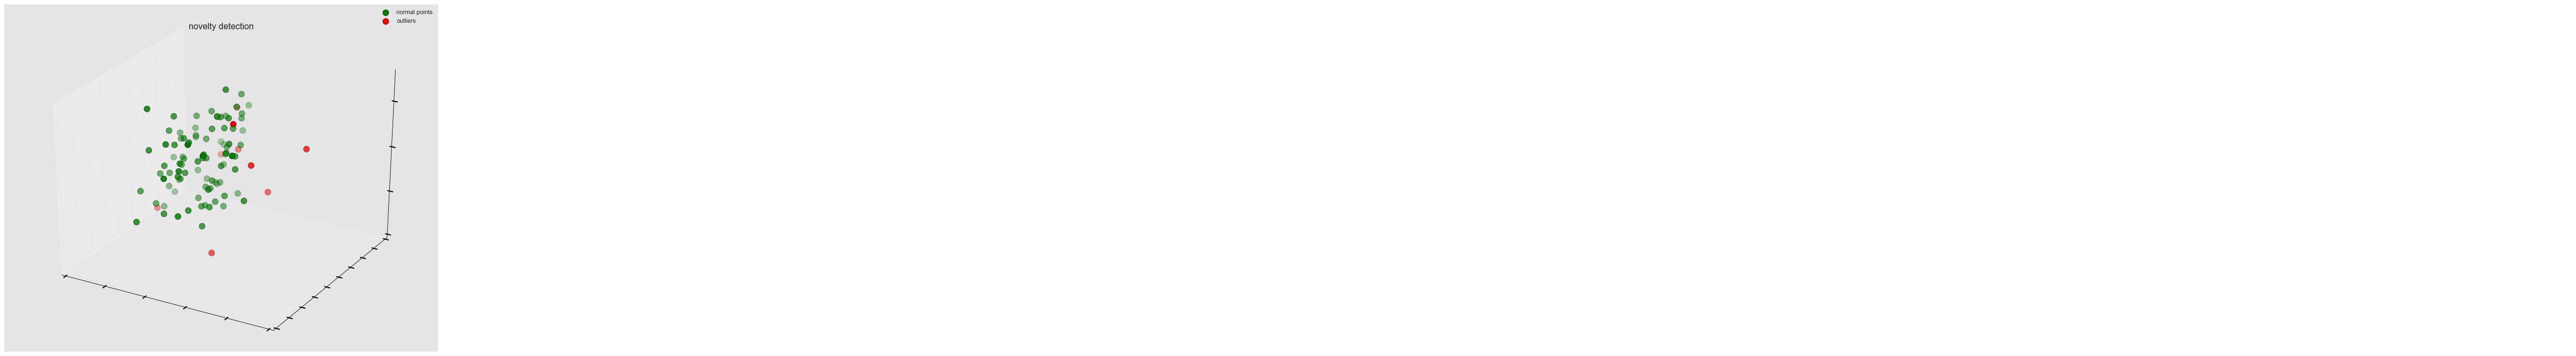

In [24]:
# 异常检测结果展示
plt.style.use('ggplot')  # 使用ggplot样式库
fig = plt.figure(figsize=(10,8))  # 创建画布对象
ax = Axes3D(fig)  # 将画布转换为3D类型
s1 = ax.scatter(normal_test_data[:, 0], normal_test_data[:, 1], normal_test_data[:, 2], s=100, edgecolors='k', c='g',
                marker='o')  # 画出正常样本点
s2 = ax.scatter(outlier_test_data[:, 0], outlier_test_data[:, 1], outlier_test_data[:, 2], s=100, edgecolors='k', c='r',
                marker='o')  # 画出异常样本点
ax.w_xaxis.set_ticklabels([])  # 隐藏x轴标签，只保留刻度线
ax.w_yaxis.set_ticklabels([])  # 隐藏y轴标签，只保留刻度线
ax.w_zaxis.set_ticklabels([])  # 隐藏z轴标签，只保留刻度线
ax.legend([s1, s2], ['normal points', 'outliers'], loc=0)  # 设置两类样本点的图例
plt.title('novelty detection')  # 设置图像标题
plt.show()  # 展示图像

# 时间序列

In [3]:
# 导入库
import pandas as pd  # pandas库
import numpy as np  # numpy库
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # acf和pacf展示库
from statsmodels.tsa.stattools import adfuller  # adf检验库
from statsmodels.stats.diagnostic import acorr_ljungbox  # 随机性检验库
from statsmodels.tsa.arima_model import ARMA  # ARMA库
import matplotlib.pyplot as plt  # matplotlib图形展示库
import prettytable  # 导入表格库

In [4]:

# 多次用到的表格
def pre_table(table_name, table_rows):
    '''
    :param table_name: 表格名称，字符串列表
    :param table_rows: 表格内容，嵌套列表
    :return: 展示表格对象
    '''
    table = prettytable.PrettyTable()  # 创建表格实例
    table.field_names = table_name  # 定义表格列名
    for i in table_rows:  # 循环读多条数据
        table.add_row(i)  # 增加数据
    return table


# 数据平稳处理
def get_best_log(ts, max_log=5, rule1=True, rule2=True):
    '''
    :param ts: 时间序列数据，Series类型
    :param max_log: 最大log处理的次数，int型
    :param rule1: rule1规则布尔值，布尔型
    :param rule2: rule2规则布尔值，布尔型
    :return: 达到平稳处理的最佳次数值和处理后的时间序列
    '''
    if rule1 and rule2:  # 如果两个规则同时满足
        return 0, ts  # 直接返回0和原始时间序列数据
    else:  # 只要有一个规则不满足
        for i in range(1, max_log):  # 循环做log处理
            ts = np.log(ts)  # log处理
            adf, pvalue1, usedlag, nobs, critical_values, icbest = adfuller(ts)  # 稳定性（ADF）检验
            lbvalue, pvalue2 = acorr_ljungbox(ts, lags=1)  # 白噪声（随机性）检验
            rule_1 = (adf < critical_values['1%'] and adf < critical_values['5%'] and adf < critical_values[
                '10%'] and pvalue1 < 0.01)  # 稳定性（ADF）检验规则
            rule_2 = (pvalue2 < 0.05)  # 白噪声（随机性）规则
            rule_3 = (i < 5)
            if rule_1 and rule_2 and rule_3:  # 如果同时满足条件
                print ('The best log n is: {0}'.format(i))  # 打印输出最佳次数
                return i, ts  # 返回最佳次数和处理后的时间序列


# 还原经过平稳处理的数据
def recover_log(ts, log_n):
    '''
    :param ts: 经过log方法平稳处理的时间序列，Series类型
    :param log_n: log方法处理的次数，int型
    :return: 还原后的时间序列
    '''
    for i in range(1, log_n + 1):  # 循环多次
        ts = np.exp(ts)  # log方法还原
    return ts  # 返回时间序列


# 稳定性（ADF）检验
def adf_val(ts, ts_title, acf_title, pacf_title):
    '''
    :param ts: 时间序列数据，Series类型
    :param ts_title: 时间序列图的标题名称，字符串
    :param acf_title: acf图的标题名称，字符串
    :param pacf_title: pacf图的标题名称，字符串
    :return: adf值、adf的p值、三种状态的检验值
    '''
    plt.figure()
    plt.plot(ts)  # 时间序列图
    plt.title(ts_title)  # 时间序列标题
    plt.show()
    plot_acf(ts, lags=20, title=acf_title).show()  # 自相关检测
    plot_pacf(ts, lags=20, title=pacf_title).show()  # 偏相关检测
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ts)  # 稳定性（ADF）检验
    table_name = ['adf', 'pvalue', 'usedlag', 'nobs', 'critical_values', 'icbest']  # 表格列名列表
    table_rows = [[adf, pvalue, usedlag, nobs, critical_values, icbest]]  # 表格行数据，嵌套列表
    adf_table = pre_table(table_name, table_rows)  # 获得平稳性展示表格对象
    print ('stochastic score')  # 打印标题
    print (adf_table)  # 打印展示表格
    return adf, pvalue, critical_values,  # 返回adf值、adf的p值、三种状态的检验值


# 白噪声（随机性）检验
def acorr_val(ts):
    '''
    :param ts: 时间序列数据，Series类型
    :return: 白噪声检验的P值和展示数据表格对象
    '''
    lbvalue, pvalue = acorr_ljungbox(ts, lags=1)  # 白噪声检验结果
    table_name = ['lbvalue', 'pvalue']  # 表格列名列表
    table_rows = [[lbvalue, pvalue]]  # 表格行数据，嵌套列表
    acorr_ljungbox_table = pre_table(table_name, table_rows)  # 获得白噪声检验展示表格对象
    print ('stationarity score')  # 打印标题
    print (acorr_ljungbox_table)  # 打印展示表格
    return pvalue  # 返回白噪声检验的P值和展示数据表格对象


# arma最优模型训练
def arma_fit(ts):
    '''
    :param ts: 时间序列数据，Series类型
    :return: 最优状态下的p值、q值、arma模型对象、pdq数据框和展示参数表格对象
    '''
    max_count = int(len(ts) / 10)  # 最大循环次数最大定义为记录数的10%
    bic = float('inf')  # 初始值为正无穷
    tmp_score = []  # 临时p、q、aic、bic和hqic的值的列表
    for tmp_p in range(max_count + 1):  # p循环max_count+1次
        for tmp_q in range(max_count + 1):  # q循环max_count+1次
            model = ARMA(ts, order=(tmp_p, tmp_q))  # 创建ARMA模型对象
            try:
                results_ARMA = model.fit(disp=-1, method='css')  # ARMA模型训练
            except:
                continue  # 遇到报错继续
            finally:
                tmp_aic = results_ARMA.aic  # 模型的获得aic
                tmp_bic = results_ARMA.bic  # 模型的获得bic
                tmp_hqic = results_ARMA.hqic  # 模型的获得hqic
                tmp_score.append([tmp_p, tmp_q, tmp_aic, tmp_bic, tmp_hqic])  # 追加每个模型的训练参数和结果
                if tmp_bic < bic:  # 如果模型bic小于最小值，那么获得最优模型ARMA的下列参数：
                    p = tmp_p  # 最优模型ARMA的p值
                    q = tmp_q  # 最优模型ARMA的q值
                    model_arma = results_ARMA  # 最优模型ARMA的模型对象
                    aic = tmp_bic  # 最优模型ARMA的aic
                    bic = tmp_bic  # 最优模型ARMA的bic
                    hqic = tmp_bic  # 最优模型ARMA的hqic
    pdq_metrix = np.array(tmp_score)  # 将嵌套列表转换为矩阵
    pdq_pd = pd.DataFrame(pdq_metrix, columns=['p', 'q', 'aic', 'bic', 'hqic'])  # 基于矩阵创建数据框
    table_name = ['p', 'q', 'aic', 'bic', 'hqic']  # 表格列名列表
    table_rows = [[p, q, aic, bic, hqic]]  # 表格行数据，嵌套列表
    parameter_table = pre_table(table_name, table_rows)  # 获得最佳ARMA模型结果展示表格对象
    print ('each p/q traning record')  # 打印标题
    print (pdq_pd)  # 打印输出每次ARMA拟合结果，包含p、d、q以及对应的AIC、BIC、HQIC
    print ('best p and q')  # 打印标题
    print (parameter_table)  # 输出最佳ARMA模型结果展示表格对象
    return model_arma  # 最优状态下的arma模型对象


# 模型训练和效果评估
def train_test(model_arma, ts, log_n, rule1=True, rule2=True):
    '''
    :param model_arma: 最优ARMA模型对象
    :param ts: 时间序列数据，Series类型
    :param log_n: 平稳性处理的log的次数，int型
    :param rule1: rule1规则布尔值，布尔型
    :param rule2: rule2规则布尔值，布尔型
    :return: 还原后的时间序列
    '''
    train_predict = model_arma.predict()  # 得到训练集的预测时间序列
    if not (rule1 and rule2):  # 如果两个条件有任意一个不满足
        train_predict = recover_log(train_predict, log_n)  # 恢复平稳性处理前的真实时间序列值
        ts = recover_log(ts, log_n)  # 时间序列还原处理
    ts_data_new = ts[train_predict.index]  # 将原始时间序列数据的长度与预测的周期对齐
    RMSE = np.sqrt(np.sum((train_predict - ts_data_new) ** 2) / ts_data_new.size)  # 求RMSE
    # 对比训练集的预测和真实数据
    plt.figure()  # 创建画布
    train_predict.plot(label='predicted data', style='--')  # 以虚线展示预测数据
    ts_data_new.plot(label='raw data')  # 以实线展示原始数据
    plt.legend(loc='best')  # 设置图例位置
    plt.title('raw data and predicted data with RMSE of %.2f' % RMSE)  # 设置标题
    plt.show()  # 展示图像
    return ts  # 返回还原后的时间序列


# 预测未来指定时间项的数据
def predict_data(model_arma, ts, log_n, start, end, rule1=True, rule2=True):
    '''
    :param model_arma: 最优ARMA模型对象
    :param ts: 时间序列数据，Series类型
    :param log_n: 平稳性处理的log的次数，int型
    :param start: 要预测数据的开始时间索引
    :param end: 要预测数据的结束时间索引
    :param rule1: rule1规则布尔值，布尔型
    :param rule2: rule2规则布尔值，布尔型
    :return: 无
    '''
    predict_ts = model_arma.predict(start=start, end=end)  # 预测未来指定时间项的数据
    print ('-----------predict data----------')  # 打印标题
    if not (rule1 and rule2):  # 如果两个条件有任意一个不满足
        predict_ts = recover_log(predict_ts, log_n)  # 还原数据
    print (predict_ts)  # 展示预测数据
    # 展示预测趋势
    plt.figure()  # 创建画布
    ts.plot(label='raw time series')  # 设置推向标签
    predict_ts.plot(label='predicted data', style='--')  # 以虚线展示预测数据
    plt.legend(loc='best')  # 设置图例位置
    plt.title('predicted time series')  # 设置标题
    plt.show()  # 展示图像


data summary
count    149.000000
mean     164.382553
std       75.097740
min       47.000000
25%      100.000000
50%      156.000000
75%      201.000000
max      400.000000
Name: number, dtype: float64


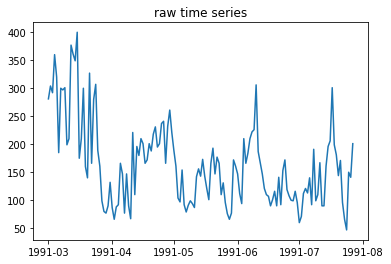

stochastic score
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
|         adf         |         pvalue        | usedlag | nobs |                                  critical_values                                  |       icbest       |
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
| -3.7642778196383406 | 0.0032946903802968273 |    11   | 137  | {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603} | 1405.3846604574503 |
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
stationarity score
+---------------+------------------+
|    lbvalue    |      pvalue      |
+---------------+------------------+
| [

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


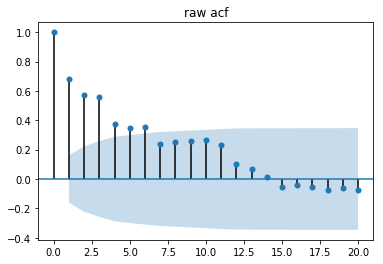

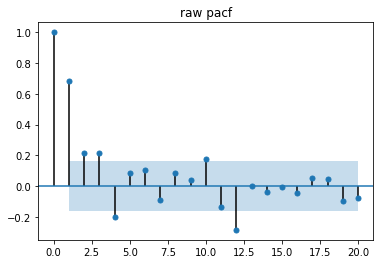

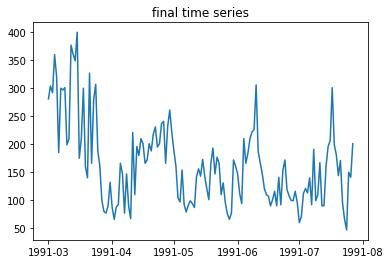

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will r

stochastic score
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
|         adf         |         pvalue        | usedlag | nobs |                                  critical_values                                  |       icbest       |
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
| -3.7642778196383406 | 0.0032946903802968273 |    11   | 137  | {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603} | 1405.3846604574503 |
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
stationarity score
+---------------+------------------+
|    lbvalue    |      pvalue      |
+---------------+------------------+
| [

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequ

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequ

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequ

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequ

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferr

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequen

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge

each p/q traning record
        p     q          aic          bic         hqic
0     0.0   0.0  1712.839862  1718.847755  1715.280770
1     0.0   1.0  1653.446702  1662.458541  1657.108063
2     0.0   2.0  1648.868523  1660.884308  1653.750338
3     0.0   3.0  1618.676555  1633.696287  1624.778824
4     0.0   4.0  1619.720071  1637.743748  1627.042793
5     0.0   5.0  1619.720071  1637.743748  1627.042793
6     0.0   6.0  1601.914727  1625.946297  1611.678357
7     0.0   7.0  1603.490230  1630.525746  1614.474313
8     0.0   8.0  1603.310918  1633.350381  1615.515455
9     0.0   9.0  1605.309821  1638.353230  1618.734812
10    0.0  10.0  1605.309821  1638.353230  1618.734812
11    0.0  11.0  1605.309821  1638.353230  1618.734812
12    0.0  12.0  1605.309821  1638.353230  1618.734812
13    0.0  13.0  1605.309821  1638.353230  1618.734812
14    0.0  14.0  1605.309821  1638.353230  1618.734812
15    1.0   0.0  1607.860643  1616.852280  1611.513924
16    1.0   1.0  1597.519474  1609.508323

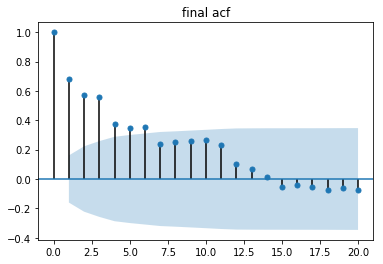

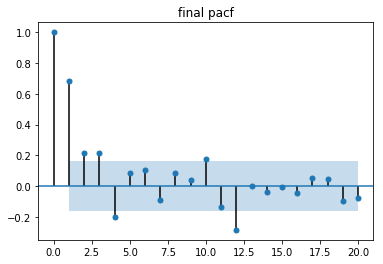

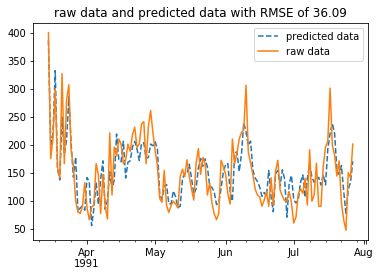

-----------predict data----------
1991-07-28    180.324135
1991-07-29    163.852458
1991-07-30    149.992696
1991-07-31    171.999813
1991-08-01    140.003496
1991-08-02    125.021993
Freq: D, dtype: float64


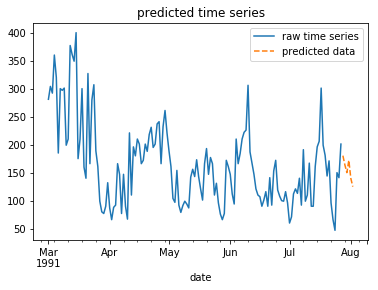

In [5]:

# 读取数据
date_parse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')  # 创建解析列的功能对象
df = pd.read_table('./datacode_for_book/chapter4/time_series.txt', delimiter='\t', index_col='date', date_parser=date_parse)  # 读取数据
ts_data = df['number'].astype('float32')  # 将列转换为float32类型
print ('data summary')  # 打印标题
print (ts_data.describe())  # 打印输出时间序列数据概况
# 原始数据检验
adf, pvalue1, critical_values = adf_val(ts_data, 'raw time series', 'raw acf', 'raw pacf')  # 稳定性检验
pvalue2 = acorr_val(ts_data)  # 白噪声检验
# 创建用于区分是否进行平稳性处理的规则
rule1 = (adf < critical_values['1%'] and adf < critical_values['5%'] and adf < critical_values[
    '10%'] and pvalue1 < 0.01)  # 稳定性检验
rule2 = (pvalue2[0,] < 0.05)  # 白噪声检验
# 对时间序列做稳定性处理
log_n, ts_data = get_best_log(ts_data, max_log=5, rule1=rule1, rule2=rule2)
# 再次做检验
adf, pvalue1, critical_values = adf_val(ts_data, 'final time series', 'final acf', 'final pacf')  # 稳定性检验
pvalue2 = acorr_val(ts_data)  # 白噪声检验
# 训练最佳ARMA模型并输出相关参数和对象
model_arma = arma_fit(ts_data)
# 模型训练和效果评估
ts_data = train_test(model_arma, ts_data, log_n, rule1=rule1, rule2=rule2)
# 模型预测应用
start = '1991-07-28'  # 设置预测开始的时间索引
end = '1991-08-02'  # 设置预测结束的时间索引
predict_data(model_arma, ts_data, log_n, start, end, rule1=rule1, rule2=rule2)  # 预测时间序列数据
